In [66]:
from tensorflow.keras import layers
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.metrics import roc_curve, auc


In [67]:
# Directory with our training dandelion pictures

train_primary_dir = os.path.join('../../data/rect_train_V3_balanced/training/primary')

# Directory with our training grass pictures
train_recurrent_dir = os.path.join('../../data/rect_train_V3_balanced/training/recurrent')

# Directory with our validation dandelion pictures
valid_primary_dir = os.path.join('../../data/rect_train_V3_balanced/validation/primary')

# Directory with our validation grass pictures
valid_recurrent_dir = os.path.join('../../data/rect_train_V3_balanced/validation/recurrent')

In [68]:
train_primary_names = os.listdir(train_primary_dir)
print(train_primary_names[:10])

train_recurrent_names = os.listdir(train_recurrent_dir)
print(train_recurrent_names[:10])

validation_primary_names = os.listdir(valid_primary_dir)
print(validation_primary_names[:10])

validation_recurrent_names = os.listdir(valid_recurrent_dir)
print(validation_recurrent_names[:10])

['CoreID111_rect.jpg', 'CoreID124_rect.jpg', 'CoreID125_rect.jpg', 'CoreID126_rect.jpg', 'CoreID127_rect.jpg', 'CoreID128_rect.jpg', 'CoreID129_rect.jpg', 'CoreID12_rect.jpg', 'CoreID133_rect.jpg', 'CoreID13_rect.jpg']
['CoreID101_rect.jpg', 'CoreID102_rect.jpg', 'CoreID105_rect.jpg', 'CoreID107_rect.jpg', 'CoreID108_rect.jpg', 'CoreID120_rect.jpg', 'CoreID122_rect.jpg', 'CoreID123_rect.jpg', 'CoreID130_rect.jpg', 'CoreID131_rect.jpg']
['CoreID2_rect.jpg', 'CoreID37_rect.jpg', 'CoreID38_rect.jpg', 'CoreID49_rect.jpg', 'CoreID52_rect.jpg', 'CoreID84_rect.jpg', 'CoreID85_rect.jpg', 'primary0.jpg', 'primary123.jpg', 'primary159.jpg']
['CoreID114_rect.jpg', 'CoreID119_rect.jpg', 'CoreID3_rect.jpg', 'CoreID51_rect.jpg', 'CoreID53_rect.jpg', 'CoreID76_rect.jpg', 'CoreID77_rect.jpg', 'recurrent156.jpg', 'recurrent71.jpg', 'recurrent94.jpg']


In [69]:
print('total training primary images:', len(os.listdir(train_primary_dir)))
print('total training recurrent images:', len(os.listdir(train_recurrent_dir)))
print('total validation primary images:', len(os.listdir(valid_primary_dir)))
print('total validation recurrent images:', len(os.listdir(valid_recurrent_dir)))

total training primary images: 217
total training recurrent images: 64
total validation primary images: 22
total validation recurrent images: 10


In [70]:
%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


In [71]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.3,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [72]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.3,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

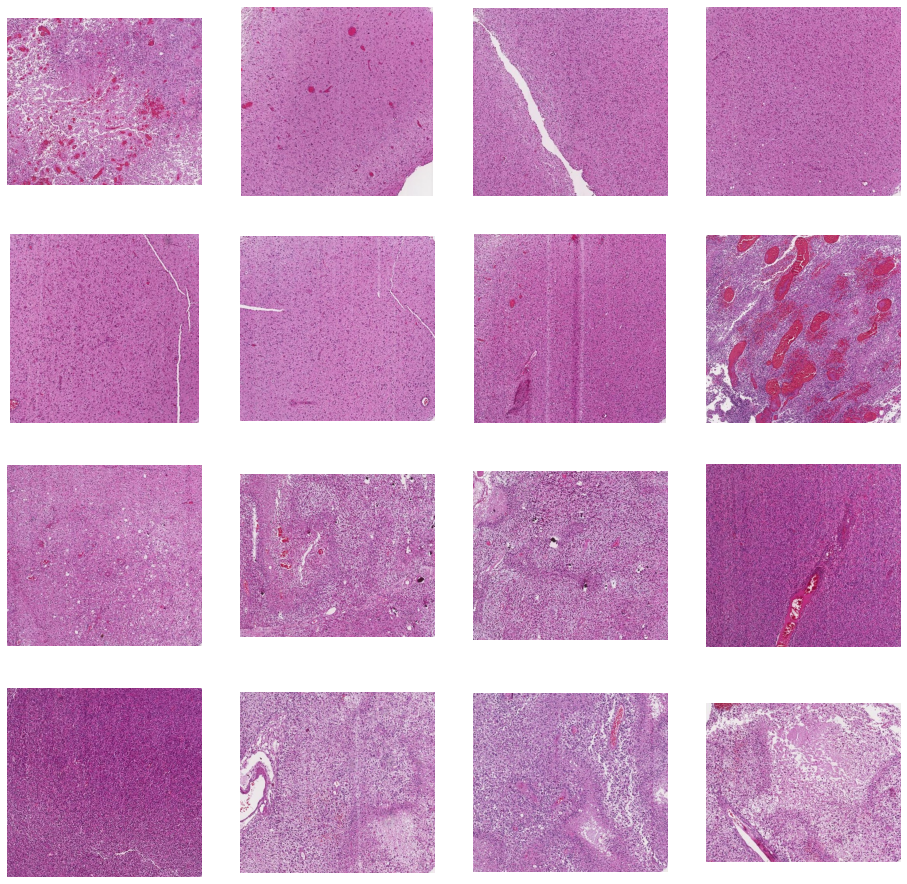

In [73]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pic = [os.path.join(train_primary_dir, fname)
                for fname in train_primary_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_recurrent_dir, fname)
                for fname in train_recurrent_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [74]:
img_height = 200
img_width = 200

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '../../data/rect_train_V3_balanced/training/',  # This is the source directory for training images
        classes = ['primary', 'recurrent'],
        target_size=(img_height, img_width),  # All images will be resized to 200x200
        batch_size=64,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '../../data/rect_train_V3_balanced/validation/',  # This is the source directory for training images
        classes = ['primary', 'recurrent'],
        target_size=(img_height, img_height),  # All images will be resized to 200x200
        batch_size=32,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 281 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [75]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(input_shape = (img_height,img_width,3)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15,360,257
Trainable params: 15,360,257
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [78]:
epochs=500
# history = model.fit(
#       train_generator,
#       steps_per_epoch=8,
#       epochs=15,
#       verbose=1,
#       validation_data = validation_generator,
#       validation_steps=8)

history = model.fit(train_generator,
      steps_per_epoch=5,
      epochs=epochs,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=5)

Epoch 1/500
5/5 [==============================] - 3s 397ms/step - loss: 76.6946 - accuracy: 0.5907 - val_loss: 15.1959 - val_accuracy: 0.6875
Epoch 2/500
5/5 [==============================] - 1s 128ms/step - loss: 7.6354 - accuracy: 0.7722
Epoch 3/500
5/5 [==============================] - 1s 126ms/step - loss: 2.9849 - accuracy: 0.5552

In [79]:
model.evaluate(validation_generator)

1/1 [==============================] - 0s 118ms/step - loss: 1.0189 - accuracy: 0.6562


[1.0188610553741455, 0.65625]

In [80]:
history_dict = history.history
print(history_dict)

STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)


{'loss': [76.69456481933594, 7.635378837585449, 2.9849114418029785, 5.743315696716309, 3.31463885307312, 1.6000266075134277, 1.13290536403656, 0.8006468415260315, 0.5877866148948669, 0.49686190485954285, 0.4920975863933563, 0.5549827814102173, 0.4690154194831848, 0.386000394821167, 0.3429214060306549, 0.33549565076828003, 0.2957172393798828, 0.3592826724052429, 0.31422775983810425, 0.2966231107711792, 0.23156151175498962, 0.22197628021240234, 0.22183002531528473, 0.20326650142669678, 0.206508606672287, 0.19820360839366913, 0.21123969554901123, 0.226091668009758, 0.23562858998775482, 0.24430087208747864, 0.20260412991046906, 0.20145833492279053, 0.1890573650598526, 0.2019614577293396, 0.16504999995231628, 0.16044576466083527, 0.164900004863739, 0.1918766349554062, 0.16926589608192444, 0.19602136313915253, 0.16955818235874176, 0.13290584087371826, 0.13451367616653442, 0.11759104579687119, 0.12251561135053635, 0.11370443552732468, 0.11284415423870087, 0.12008785456418991, 0.15712364017963

In [81]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [82]:
roc_auc = auc(fpr, tpr)

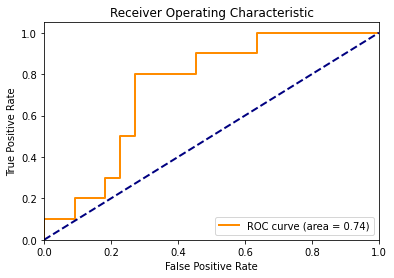

In [83]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 0s 37ms/step
[[0.]]
is a primary tumour 


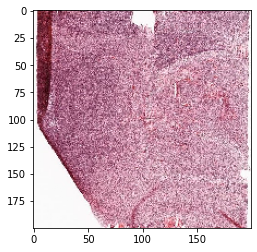

In [84]:
from keras.preprocessing import image


path = '../../data/test/primary/primary18.jpg'
img = tf.keras.utils.load_img(path, target_size=(200, 200))
x = tf.keras.utils.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)
if classes[0]<0.5:
    print("is a primary tumour ")
else:
    print("is a recurrent tumour")